## **Span**

In [ ]:
import spacy
import en_core_web_sm
nlp_example = en_core_web_sm.load()
my_doc = nlp_example("This is my first example.")
span = my_doc[1:6]
span

is my first example.

## **Token**

In [ ]:
import spacy
import en_core_web_sm
nlp_example = en_core_web_sm.load()
my_doc = nlp_example("This is my first example.")
token = my_doc[4]
token

example

## **Tokenization**

In [ ]:
import spacy

In [ ]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [ ]:
# nlp = spacy.load("en_core_web_md")
doc = nlp("We are learning NLP using SpaCy.")
print([token.text for token in doc])

['We', 'are', 'learning', 'NLP', 'using', 'SpaCy', '.']


## **Customizing the Tokenizer**

In [ ]:
import spacy
from spacy.symbols import ORTH
nlp = en_core_web_sm.load()
doc = nlp("NewYork is a beautiful city.")
print([token.text for token in doc])
special_case = [{ORTH:"New"}, {ORTH: "York"}]
nlp.tokenizer.add_special_case("NewYork", special_case)
print([token.text for token in nlp("NewYork is a beautiful city.")])

['NewYork', 'is', 'a', 'beautiful', 'city', '.']
['New', 'York', 'is', 'a', 'beautiful', 'city', '.']


## **Sentence Segmentation**

In [ ]:
text = "I studied effficiently this week. And today is my exam."
doc = nlp(text)
for sent in doc.sents:
  print(sent.text)

I studied effficiently this week.
And today is my exam.


## **Remove Punctutation Marks**

In [ ]:
text = "A boy that I'm seriously, deeply, madly, incredibly, and undeniably in love with. And he taught me the most important thing of all...To put the emphasis On life "
nlp = en_core_web_sm.load()
doc = nlp(text)
text_no_punct = [token for token in doc if not token.is_punct]
' '.join(t.text for t in text_no_punct)

"A boy that I 'm seriously deeply madly incredibly and undeniably in love with And he taught me the most important thing of all To put the emphasis On life"

## **Frequency Distribution in Spacy - POS**

In [ ]:
import spacy
import spacy.attrs
nlp = spacy.load("en_core_web_sm")
doc = nlp("It all happened between November 2007 and November 2008")

# Returns integers that map to parts of speech
counts_dict = doc.count_by(spacy.attrs.IDS['POS'])

# Print the human readable part of speech tags
for pos, count in counts_dict.items():
    human_readable_tag = doc.vocab[pos].text
    res = print(human_readable_tag, count)

PRON 2
VERB 1
ADP 1
PROPN 2
NUM 2
CCONJ 1


## **STOP WORDS**

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Create a set of stop words
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
  # Parse the sentence using spaCy
  doc = nlp(sentence)

  # Use a list comprehension to remove stop words
  filtered_tokens = [token for token in doc if not token.is_stop]

  # Join the filtered tokens back into a sentence
  return ' '.join([token.text for token in filtered_tokens])

In [ ]:
sentence = "This is an example sentence with stop words."

filtered_sentence = remove_stop_words(sentence)
print(filtered_sentence)
# Output: "example sentence stop words."

example sentence stop words .


## **LEMMEATIZATION**

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp('Walking is one of the main gaits of terrestrial locomotion among legged animals')

for token in doc:
    print(token.text + "-->" + token.lemma_)

Walking-->walk
is-->be
one-->one
of-->of
the-->the
main-->main
gaits-->gait
of-->of
terrestrial-->terrestrial
locomotion-->locomotion
among-->among
legged-->legged
animals-->animal


## **STEMMING**

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

words = ["run", "running", "ran"]

stemmed_words = [nlp(word)[0].lemma_ for word in words]

print(stemmed_words)
# prints: ["run", "run", "run"]

['run', 'run', 'run']


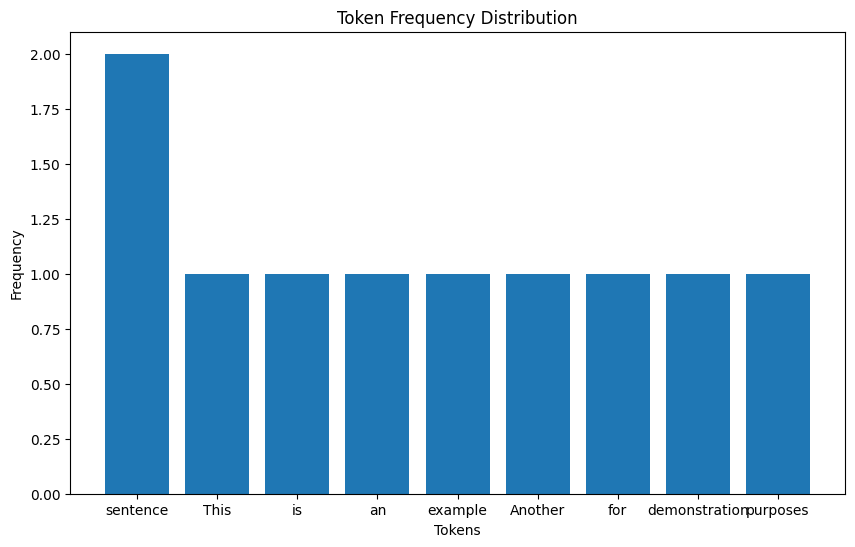

In [ ]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Example text
text = "This is an example sentence. Another sentence for demonstration purposes."

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(text)

# Extract the tokens
tokens = [token.text for token in doc if not token.is_punct and not token.is_space]

# Create a frequency distribution of tokens
freq_dist = Counter(tokens)

# Get the most common tokens and their frequencies
common_tokens = [token[0] for token in freq_dist.most_common(10)]
frequencies = [token[1] for token in freq_dist.most_common(10)]

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(common_tokens, frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Token Frequency Distribution')
plt.show()
